# Import Library

In [4]:
from utils import preprocessor
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from utils import loss
from core import MusicRecognition
from utils import saver
from core import KNN

# Load Dataset

In [41]:
#load dataset
data = pd.read_csv('dataset/Emotion_features_Basshouse.csv')
data2 = pd.read_csv('dataset/Emotion_features_deephouse.csv')
data = data.append(data2, ignore_index=True)
data

,Unnamed: 0,song_name,Genre,Class,Energy,tempo,total_beats,average_beats,chroma_stft_mean,chroma_stft_std,...,zcr_var,harm_mean,harm_std,harm_var,perc_mean,perc_std,perc_var,frame_mean,frame_std,frame_var
0,1,01 Castion & Dylerz feat. NEAD - Take Me (Ex.mp3,Bass House,Relax,6,129.199219,152815,1242.398374,0.557802,0.262862,...,0.014946,1.000000e-05,0.159635,0.025483,0.000208,0.108167,0.011700,2.275556,1.346017,1.811760
1,2,010. DJ Snake feat. Lauv - A Different Way (.mp3,Bass House,Angry,5,129.199219,153760,1260.327869,0.453072,0.306240,...,0.012775,-2.480000e-05,0.237943,0.056617,0.000008,0.174161,0.030332,2.362630,1.175441,1.381661
2,3,03 Down On Love (Moksi Remix).mp3,Bass House,Happy,6,129.199219,164504,1265.415385,0.438003,0.316769,...,0.014490,-6.520000e-06,0.134911,0.018201,-0.000429,0.204549,0.041840,1.790259,1.084248,1.175593
3,4,04 Kill It.mp3,Bass House,Angry,3,129.199219,154417,1245.298387,0.502991,0.302825,...,0.008881,2.700000e-05,0.283810,0.080548,0.000402,0.193737,0.037534,1.789098,0.979939,0.960281
4,5,04. Tujamo - One On One (Vion Konger Remix) .mp3,Bass House,Happy,8,129.199219,154481,1245.814516,0.508615,0.287085,...,0.005656,5.580000e-06,0.258874,0.067016,-0.000730,0.123336,0.015212,3.868444,2.171114,4.713737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,44,Tones and I - Dance Monkey (Robin Tayger Ext.wav,Deep House,Happy,5,123.046875,133316,1179.787611,0.539563,0.276192,...,0.028785,-2.490000e-06,0.211524,0.044742,0.000087,0.191713,0.036754,2.569288,1.394634,1.945003
154,45,Zedd & Jasmine Thompson - Funny (Breathe Car.mp3,Deep House,Happy,4,112.347147,140841,1268.837838,0.324272,0.292907,...,0.003293,-3.970000e-07,0.198123,0.039253,0.000003,0.091915,0.008448,4.376961,2.358072,5.560503
155,46,Guy Burns - Lie Machine [www.slider.kz].mp3,Deep House,Relax,3,129.199219,155565,1254.556452,0.637487,0.229090,...,0.029205,7.970000e-07,0.044332,0.001965,0.000118,0.216673,0.046947,1.993433,1.109716,1.231471
156,47,Low Steppa - Heard It All Before (Low Steppa.mp3,Deep House,Relax,4,123.046875,155794,1309.193277,0.612734,0.252979,...,0.027857,-2.560000e-05,0.166363,0.027677,0.000024,0.234461,0.054972,3.787175,1.659486,2.753894


# Feature Engineering to NP Array

In [42]:
#preprocess dataset
dataset_x, dataset_y = preprocessor.feature_engineering_knn_aidj(data)

# Split between train and test

In [43]:
#dataset splitting
x_train, x_test, y_train, y_test = train_test_split(dataset_x, dataset_y, test_siround)
x_train

array([[8.33543347e+01, 9.74750000e+04, 1.23386076e+03, ...,
        2.05148299e+00, 1.12030626e+00, 1.25508613e+00],
       [1.17453835e+02, 1.51127000e+05, 1.28073729e+03, ...,
        2.42764626e+00, 1.26262921e+00, 1.59423251e+00],
       [6.45996094e+01, 7.75460000e+04, 1.25074194e+03, ...,
        6.58982313e+00, 3.61518811e+00, 1.30695851e+01],
       ...,
       [1.29199219e+02, 1.64834000e+05, 1.28776562e+03, ...,
        1.77748753e+00, 9.30899392e-01, 8.66573678e-01],
       [1.23046875e+02, 1.34847000e+05, 1.17258261e+03, ...,
        2.58089796e+00, 1.55159474e+00, 2.40744625e+00],
       [1.23046875e+02, 1.56558000e+05, 1.27282927e+03, ...,
        2.50775510e+00, 1.37635779e+00, 1.89436077e+00]])

# Reduce dimension using PCA
## Notes that the explained variance > 99% to make sure data persistence

In [57]:
#dimension reduction
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
pca = PCA(n_components=20)
scaler = StandardScaler()
pca.fit(scaler.fit_transform(x_train)) #PCA based on dataset training only
pca.explained_variance_ratio_.sum()

0.9906947944199009

(126, 25)


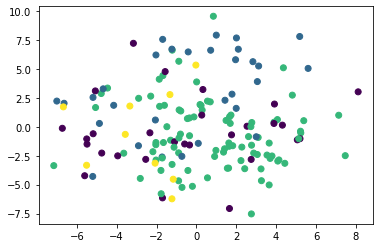

In [58]:
import matplotlib.pyplot as plt 
x_train_rd = pca.transform((x_train))
print(x_train_rd.shape)
datas = {'a': pca.transform((scaler.transform(dataset_x))).T[0],
        'b': pca.transform((scaler.transform(dataset_x))).T[1],
        'c': dataset_y.T[0]}
plt.scatter('a', 'b', c='c', data=datas)

In [44]:
print(x_train)

[[8.33543347e+01 9.74750000e+04 1.23386076e+03 ... 2.05148299e+00
  1.12030626e+00 1.25508613e+00]
 [1.17453835e+02 1.51127000e+05 1.28073729e+03 ... 2.42764626e+00
  1.26262921e+00 1.59423251e+00]
 [6.45996094e+01 7.75460000e+04 1.25074194e+03 ... 6.58982313e+00
  3.61518811e+00 1.30695851e+01]
 ...
 [1.29199219e+02 1.64834000e+05 1.28776562e+03 ... 1.77748753e+00
  9.30899392e-01 8.66573678e-01]
 [1.23046875e+02 1.34847000e+05 1.17258261e+03 ... 2.58089796e+00
  1.55159474e+00 2.40744625e+00]
 [1.23046875e+02 1.56558000e+05 1.27282927e+03 ... 2.50775510e+00
  1.37635779e+00 1.89436077e+00]]


In [45]:
for neigh in range(20):
    knn = KNN.KNN(num_neighbor = neigh+1)
    # print(x_train)
    knn.train(x_train, y_train)

    #yield acc
    y_pred = knn.infer((x_test))
    # print(y_pred.T[0])
    # print(loss.hamming_score(y_test, y_pred))
    print(accuracy_score(y_test.T[0], y_pred.T[0]))
    # print(accuracy_score(y_test.T[0], y_pred.T[0]) * accuracy_score(y_test.T[1], y_pred.T[1])) #ALL must TRUE metrics

0.40625
0.4375
0.5
0.53125
0.625
0.59375
0.59375
0.625
0.59375
0.625
0.5625
0.5625
0.5625
0.59375
0.5625
0.59375
0.59375
0.59375
0.59375
0.59375


In [70]:
#use best neighbor to train (only for class classifier)
knn = KNN.KNN(num_neighbor = 5)
    # print(x_train)
knn.train(x_train, y_train.T[0])
y1_pred = knn.infer(((x_test)))
    # print(y_pred.T[0])
    # print(loss.hamming_score(y_test, y_pred))
print(accuracy_score(y_test.T[0], y1_pred))

0.625


In [103]:
#linearRegression part (for energy regressor)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
lr = KNN.KNN(num_neighbor = 10, weights='distance')
lr.train(x_train_rd, y_train.T[1])
y2_pred = lr.infer(pca.transform((x_test)))
print(np.round(y2_pred))
print(accuracy_score(y_test.T[1], np.round(y2_pred)))
print(y_test.T[1])
print(np.square(y_test.T[1] - y2_pred).mean(axis=0))

[7 7 6 6 6 4 5 3 6 6 6 6 3 3 3 4 4 4 6 4 6 6 6 5 5 6 4 6 7 5 4 6]
0.375
[6 7 6 7 7 3 5 5 6 6 7 6 4 6 4 4 5 4 4 4 7 6 6 4 4 5 2 7 4 6 2 6]
1.5


In [70]:
mr = MusicRecognition.MusicRecognition(knn, lr, pca)
saver.saveObj("cache/mr.bin",mr)